# RAG - Text using Chroma DB - LLM Model - all-MiniLM-L6-v2

In [1]:
# install the necessary packaages/modules
#!pip install langchain
#!pip install sentence-transformers 
#!pip install langchain-chroma
#!pip install langchain-community
#!pip install PyPDF2
#!pip install pymupdf

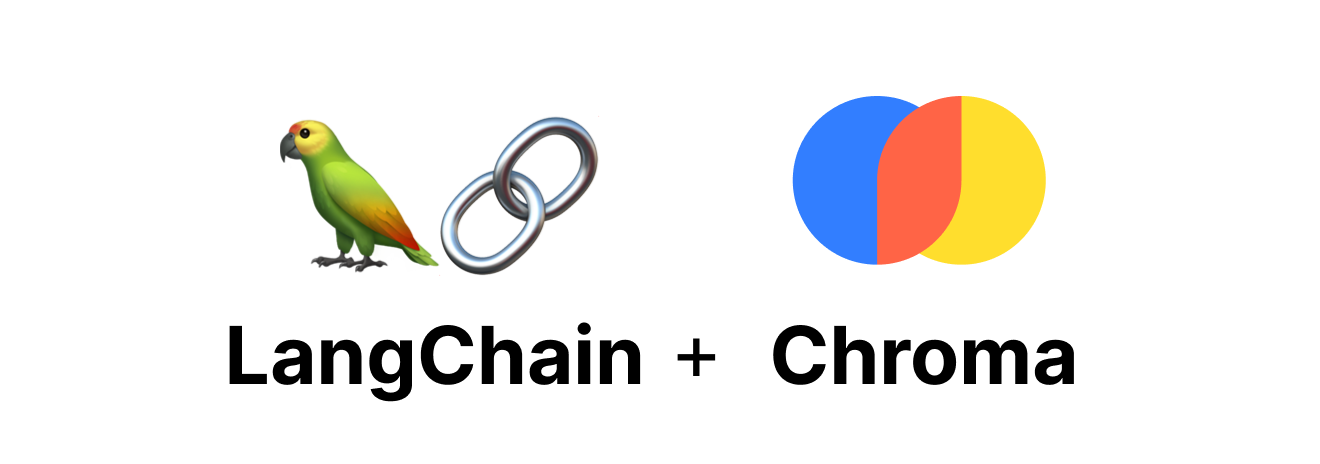

# Import Packages

In [2]:
from langchain_chroma import Chroma
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter

# load the document and split it into chunks

In [3]:
loader = TextLoader("datascience.txt")
documents = loader.load()

# split it into chunks

In [4]:
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(documents)

Created a chunk of size 1105, which is longer than the specified 1000


In [5]:
print(len(docs))
print(docs)

15
[Document(page_content='Data science is an interdisciplinary academic field[1] that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.[2]\n\nData science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).[3] Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.[4]', metadata={'source': 'datascience.txt'}), Document(page_content='Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data.[5] It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.[6] However, d

# create the open-source embedding function

In [6]:

from langchain.embeddings import SentenceTransformerEmbeddings
embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# load it into Chroma

In [7]:
db = Chroma.from_documents(docs, embedding_function)

# query it

In [8]:
query = "What is data science"
docs = db.similarity_search(query)

# Print results

In [9]:
# print results
print(docs[0].page_content)

Data science is an interdisciplinary academic field[1] that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.[2]

Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).[3] Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.[4]
